In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import cv2
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
# set paths for accessing the datasets
data_dir = 'dataset/'                 #assigns the directory path where the dataset is located.
train_path = 'dataset/Train.csv'         #assigns the directory path for the training data within the dataset
test_path = 'dataset/Test.csv'               #assigns the directory path for the testing data within the dataset.

meta_path='dataset/Meta.csv'



# --------------------------------------------------
traindf=pd.read_csv(train_path)
testdf=pd.read_csv(test_path)
metadf=pd.read_csv(meta_path)

In [3]:
traindf

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


__Resize the image__


This is essential as neural networks accepts the image of consistent size

__Loading Image paths and labels__

In [ ]:
target_size = (30, 30)  # setting the size of image

# lists to store images and labels
images = []
processed_labels = []

for i, row in traindf.iterrows():
    # accessing each image via the path specified
    img_path = '' + row['Path']
    image=cv2.imread(img_path)
    if image is not None:
        # resizing the image
        image=cv2.resize(image,target_size)

        # # converting images to rgb format
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # normalizing the image
        image = image / 255
        
        # adding all the resized image value
        images.append(image)
        # storing the class label of each image with respect to the resized image
        # processed_labels.append(traindf.iloc[i]['ClassId'])
        processed_labels.append(row['ClassId'])

images = np.array(images)
processed_labels = np.array(processed_labels)




In [5]:
print(processed_labels)
# print(images)

[20 20 20 ... 42 42 42]


__One hot Encoder__

Neural networks, for instance, typically have an output layer with one neuron for each class (in this case, 43 classes).

The output for each image would be a vector of probabilities that sums to 1, indicating the likelihood of the image belonging to each class.

In [6]:
labelencoder=LabelEncoder()
processed_labels=labelencoder.fit_transform(processed_labels)

# applying one hot encoding to the labels
processed_labels=to_categorical(processed_labels)

# here the folder 0 will have the values like [1,0,0,...0,0,0]
# and the last folder will have the values like [0,0,0...0,0,1]

# performing one hot encoding, will make machine understand the binary data format
print(processed_labels.shape)
processed_labels

(39209, 43)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [7]:
print(processed_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [8]:
print(images)

[[[[0.18039216 0.2        0.21960784]
   [0.18823529 0.2        0.21960784]
   [0.19215686 0.2        0.21176471]
   ...
   [0.19607843 0.18823529 0.19215686]
   [0.19215686 0.19607843 0.2       ]
   [0.18039216 0.19215686 0.19215686]]

  [[0.18431373 0.2        0.21960784]
   [0.18431373 0.19215686 0.21176471]
   [0.19215686 0.19607843 0.21176471]
   ...
   [0.20784314 0.19607843 0.19607843]
   [0.21176471 0.21176471 0.20784314]
   [0.18039216 0.19607843 0.19607843]]

  [[0.18431373 0.2        0.21960784]
   [0.18039216 0.19215686 0.20784314]
   [0.18431373 0.19215686 0.20784314]
   ...
   [0.22745098 0.21176471 0.20784314]
   [0.23137255 0.23529412 0.22745098]
   [0.18431373 0.20392157 0.20392157]]

  ...

  [[0.18823529 0.2        0.21568627]
   [0.19607843 0.20392157 0.21960784]
   [0.20392157 0.20392157 0.21568627]
   ...
   [0.37254902 0.3254902  0.25098039]
   [0.35294118 0.32156863 0.23921569]
   [0.28627451 0.25882353 0.2       ]]

  [[0.19215686 0.20784314 0.21960784]
   [0.2

## Training the model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# total number of images
print(f"Shape of images: {images.shape}")
# height and width of the image
print(f"Shape of labels: {processed_labels.shape}")

# splitting data into train and test
# train_images and train_labels are used for training the model
# val_images and val_lables are used for validation data 
train_images, val_images, train_labels, val_labels = train_test_split(
    images, processed_labels, test_size=0.2, random_state=42
)

# data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # 20% for validation
)

# only rescaling for validation data (no augmentation)
val_datagen = ImageDataGenerator()

# since we have large dataset, .flow method can help to divide the data for passing in neural network

# create data generators, batch_size will pass the limit of 32 images per time.
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)

# .flow will allow to resize the image through ImageDataGenerator() defined for val_datagen
val_generator = val_datagen.flow(val_images, val_labels, batch_size=32)

# defining CNN model
model = Sequential([
    # each filter will learn the different pattern of the image
    # kernel_size will scan the 3x3 size of the pixel which will generate the matrix, and then it further uses the dot product on the that matrix for learning the newly formed values
    #  Conv2D can help to detect the pattern in the image, if we go deeper, it will learn more patterns 
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='elu',padding='same'),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='elu'),
    
    # it behaves same as conv2d, but it reduces the size of feature map
    # the reason we donwsample, because resulting feature maps could be very large.
    # also, by reducing the size of image, can create complexity for model to learn. This allows the model to be introduced with the image that is of poor quality to be trained.    
    keras.layers.MaxPool2D(pool_size=(2, 2)),   # reduces dimensionality
    # here we will shut off neuron, which will make the model to use other neuron. Meaning when a certai neuron learns the specific pattern, this will make model to rely heavliy on that neuron, and overfitting condition will be observed. Therfore, shutting off a 20% of neuron will allow model to predict based on the learning of other neuron
    keras.layers.Dropout(0.2),                  # prevents for overfitting
    
    # as the weights are constantly changed compared to previous layer, which can slow down the training. Therefore, we normalize the activations (output of neurons) so they have mean 0 and std dev 1.
    # each filter output is normalized separately
    keras.layers.BatchNormalization(axis=-1),

    # to detect more complex pattern we increase the filter size
    # elu allows the model to learn the pattern better compare to relu activation function. This activation function gets the output of hte nerual network and passes it to the next layer. Note that the RELU function can sometime stop neural network to learn effectively because of dying relu proble, where it cannot handle the negative value. This can sometimes cause neural network to stop learning completely.
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='elu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='elu'),

    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),

    keras.layers.Dense(512, activation='elu'),

    keras.layers.BatchNormalization(),

    keras.layers.Dropout(rate=0.5),

    # creates the 43 layers of neurons
    # each neuron corresponds to each class
    # based on the highest probability achieved, the softmax will consider that as the final predictoin. These values ranges between [0,1]
    keras.layers.Dense(43, activation='softmax')

])

# compile the model
# adam optimizer helps the assign the learning rate for the model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', # since we have multiple class, categorical_crossentropy can classify where 1 label has multiple images
              metrics=['accuracy']) # accuracy will evaluate the performance of the model

# if the model stops improving on validation data, then we will stop on that epoch
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

# save the best model during training
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# training model
history = model.fit(
    train_generator,
    epochs=15,  # Increase the number of epochs as needed
    validation_data=val_generator,  # passing validation data to evalate the model
    callbacks=[early_stopping_cb,checkpoint] # for early stopping and saving the best model, that is altered during the epoch
)

# evlauting the performance of the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {val_accuracy:.4f}')


Shape of images: (39209, 30, 30, 3)
Shape of labels: (39209, 43)


f:\viraj\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - accuracy: 0.3209 - loss: 2.8084 - val_accuracy: 0.7566 - val_loss: 0.6956
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.6842 - loss: 1.0078 - val_accuracy: 0.9049 - val_loss: 0.2870
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.7985 - loss: 0.6199 - val_accuracy: 0.9607 - val_loss: 0.1368
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.8549 - loss: 0.4383 - val_accuracy: 0.9633 - val_loss: 0.1099
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.8862 - loss: 0.3441 - val_accuracy: 0.9765 - val_loss: 0.0810
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.9036 - loss: 0.2866 - val_accuracy: 0.9802 - val_loss: 0.0647
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.9172 - loss: 0.2441 - val_accuracy: 0.9760 - val_loss: 0.0709
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - accuracy: 0.9275 - loss: 0.2121 - 

__Visualising the train and validation accuracy__

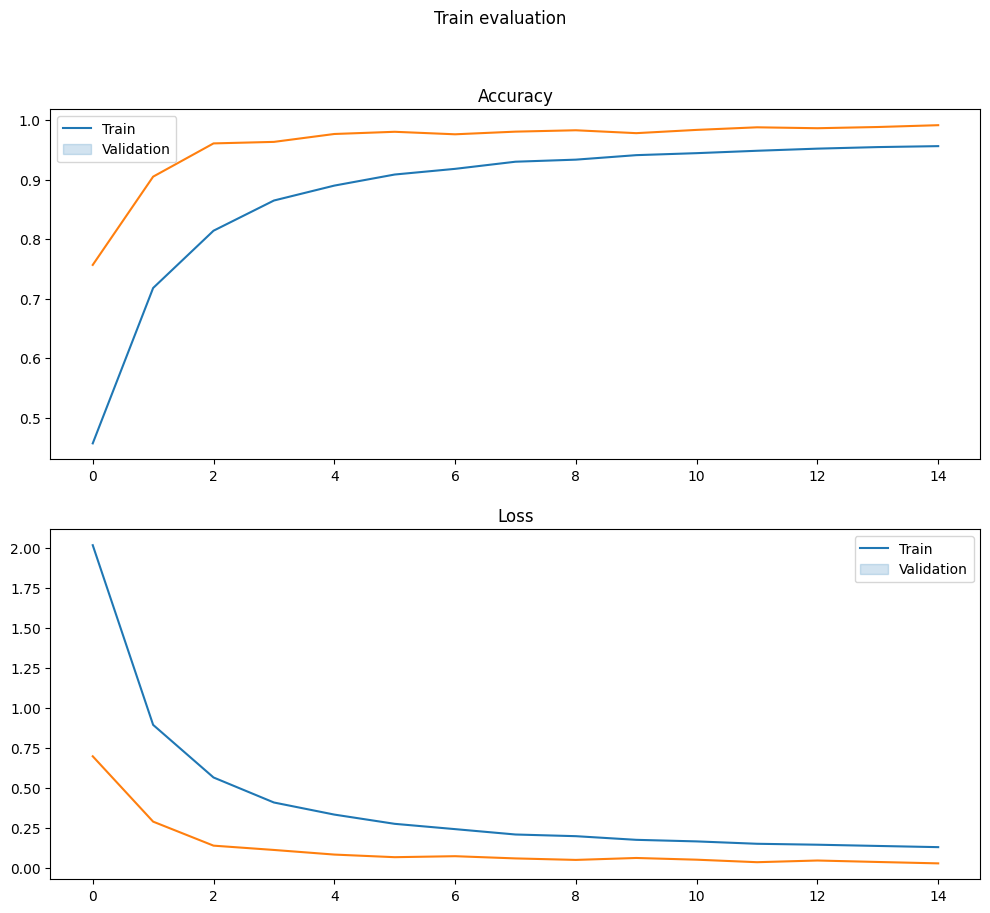

In [ ]:
# subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Train evaluation')  # Main title for the entire figure

# plotting accuracy
sns.lineplot(ax=ax[0], x=np.arange(0, len(history.history['accuracy'])), y=history.history['accuracy'])
sns.lineplot(ax=ax[0], x=np.arange(0, len(history.history['accuracy'])), y=history.history['val_accuracy'])
ax[0].legend(['Train', 'Validation'])  
ax[0].set_title('Accuracy') 

# plotting loss
sns.lineplot(ax=ax[1], x=np.arange(0, len(history.history['loss'])), y=history.history['loss'])
sns.lineplot(ax=ax[1], x=np.arange(0, len(history.history['loss'])), y=history.history['val_loss'])
ax[1].legend(['Train', 'Validation']) 
ax[1].set_title('Loss')

plt.show()


__Testing the model__

In [21]:
import numpy as np
import pandas as pd
import cv2
from tensorflow.keras.models import load_model

# loading trained model
model = load_model('best_model.keras')

# preprocessing and cropping an image based on ROI
def preprocess_image(img_path, target_size=(30, 30), roi=None):
    
    img = cv2.imread(img_path)  # reading the image file
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # converting to RGB color space
    
    # if roi, crop the image using the ROI coordinates
    if roi is not None:
        x1, y1, x2, y2 = roi
        img = img[y1:y2, x1:x2]  # cropping image

    # resizing the image 30x30
    img = cv2.resize(img, target_size)

    # normalize the pixel values to the range [0, 1] and expand dimensions for batch size
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  

    return img

# prediction of class
def predict_image(model, img_path, roi=None, target_size=(30, 30)):
    # crop and resize image
    img = preprocess_image(img_path, target_size=target_size, roi=roi)

    # prediction
    predictions = model.predict(img)

    # obtain predicted class (the class with the highest probability)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class[0]

# random 15 samples
sampled_df = testdf.sample(n=35)

# to store the predictions for the image
predictions = []

# looping through testdf
for index, row in sampled_df.iterrows():
    img_path = row['Path']  # Image file path
    roi = (row['Roi.X1'], row['Roi.Y1'], row['Roi.X2'], row['Roi.Y2'])  # ROI as (x1, y1, x2, y2)
    
    # using predict_image user defined function
    predicted_class = predict_image(model, img_path, roi=roi)
    
    # storing into the list
    predictions.append(predicted_class)


sampled_df['Predicted_Class'] = predictions

print(sampled_df[['Path', 'ClassId', 'Predicted_Class']])

sampled_df.to_csv('sampled_predictions.csv', index=False)

correct_predictions = (sampled_df['Predicted_Class'] == sampled_df['ClassId']).sum() 
total_predictions = sampled_df.shape[0] 

accuracy = correct_predictions / total_predictions

print(f"Accuracy on random sample of 15 images: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━